In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
dataset=pd.read_csv('Position_Salaries.csv')

In [2]:
len(dataset)

10

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [16]:
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

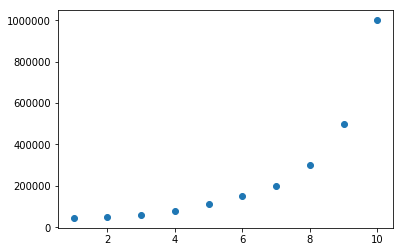

In [17]:
%matplotlib inline

plt.scatter(X,y)

In [18]:
np.shape(y)

(10,)

In [20]:
#No need as dataset is small
'''from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)'''

'from sklearn.model_selection import train_test_split\nX_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)'

In [21]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression().fit(X,y)

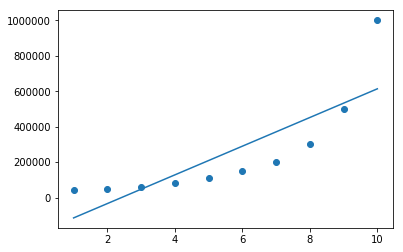

In [22]:
plt.scatter(X,y)
plt.plot(X,regressor.predict(X))

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)

In [54]:
X_poly=poly_reg.fit_transform(X)

In [55]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

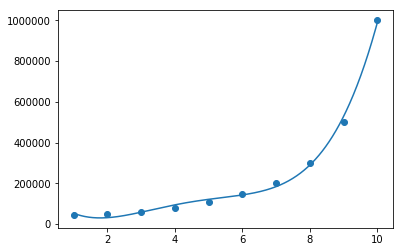

In [67]:
from sklearn.linear_model import LinearRegression
X_grid=np.arange(min(X),max(X),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
poly_regressor=LinearRegression().fit(X_poly,y)
plt.scatter(X,y)
plt.plot(X_grid,poly_regressor.predict(poly_reg.fit_transform(X_grid)))

In [60]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(y,poly_regressor.predict(poly_reg.fit_transform(X)))


12681.818181844741

In [62]:
r2_score(y,poly_regressor.predict(poly_reg.fit_transform(X)))

0.9973922891706614

In [59]:
poly_regressor.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265157])

In [64]:
help(np.reshape)

Help on function reshape in module numpy.core.fromnumeric:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the firs